In [1]:
import os
from dev.constants import gdrive_path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
path = f"{gdrive_path}/climatex_full/topics"

scores, files = {}, os.listdir(path)
for file in files:
    report = file[:3]
    claims = pd.read_json(f"{path}/{file}", orient="records", lines=True)
    for topic in claims["topic"].unique():
        if topic == "other" or topic is None: continue
        if topic not in scores.keys(): 
            scores[topic] = {}
            for r in ["AR3", "AR4", "AR5", "AR6"]:
                scores[topic][r] = {tag: 0 for tag in ["very low", "low", "medium", "high", "very high"]}

        tags = claims.loc[claims["topic"] == topic, "tag"].tolist()
        for tag in ["very low", "low", "medium", "high", "very high"]:
            scores[topic][report][tag] += len([x for x in tags if x == tag])

for topic in scores.keys():
    for report in ["AR3", "AR4", "AR5", "AR6"]:
        totals = [scores[topic][report][tag] for tag in ["very low", "low", "medium", "high", "very high"]]
        if sum(totals) == 0: 
            del scores[topic][report]
        else:
            totals = [x / sum(totals) for x in totals]
            totals = sum([x * y for x, y in zip(totals, [-2, -1, 0, 1, 2])])
            scores[topic][report] = totals

In [8]:
ar3_scores = [scores[topic]["AR3"] for topic in scores if "AR3" in scores[topic].keys()]
ar4_scores = [scores[topic]["AR4"] for topic in scores if "AR4" in scores[topic].keys()]
ar5_scores = [scores[topic]["AR5"] for topic in scores if "AR5" in scores[topic].keys()]
ar6_scores = [scores[topic]["AR6"] for topic in scores if "AR6" in scores[topic].keys()]

for x in [ar3_scores, ar4_scores, ar5_scores, ar6_scores]:
    print(len(x))

12
11
23
26


In [9]:
not_in_all = [topic for topic in scores if len(scores[topic]) < 4]
[(x, list(scores[x].keys())) for x in not_in_all]

[('sea_level', ['AR3', 'AR5', 'AR6']),
 ('disease', ['AR3', 'AR5', 'AR6']),
 ('lakes', ['AR3', 'AR4']),
 ('tropical_islands', ['AR3', 'AR5', 'AR6']),
 ('flooding', ['AR3', 'AR5', 'AR6']),
 ('cities', ['AR4', 'AR5', 'AR6']),
 ('finance', ['AR4', 'AR5', 'AR6']),
 ('wetlands', ['AR4', 'AR5', 'AR6']),
 ('oceans', ['AR5', 'AR6']),
 ('emissions', ['AR5', 'AR6']),
 ('cdr', ['AR5', 'AR6']),
 ('solar', ['AR5', 'AR6']),
 ('energy', ['AR5', 'AR6']),
 ('climate_discourse', ['AR5', 'AR6']),
 ('migration', ['AR5', 'AR6']),
 ('cyclones', ['AR5', 'AR6']),
 ('technology', ['AR5', 'AR6']),
 ('transport', ['AR6']),
 ('dryland', ['AR6']),
 ('hydropower', ['AR6'])]

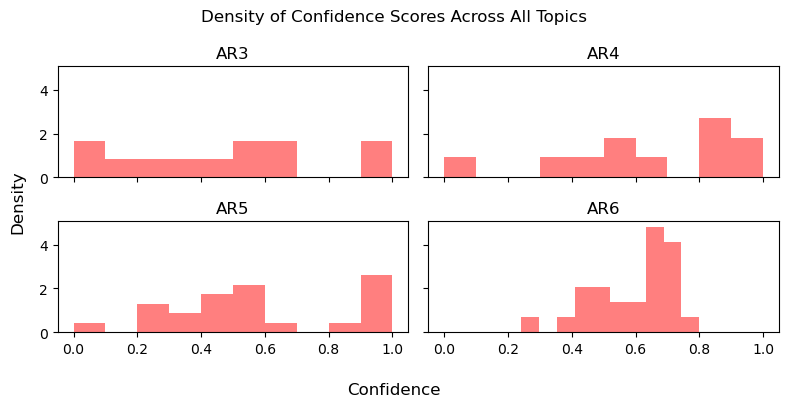

In [10]:
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, squeeze=True, figsize=(8, 4))

titles = ["AR3", "AR4", "AR5", "AR6"]
for ax, _scores, title in zip(axs.flatten(), [ar3_scores, ar4_scores, ar5_scores, ar6_scores], titles):
    ax.hist(_scores, color="red", alpha=0.5, density=True)
    ax.set_title(title)

fig.supxlabel("Confidence")
fig.supylabel("Density")
fig.suptitle("Density of Confidence Scores Across All Topics")
plt.tight_layout()
plt.show()

In [18]:
report = "AR6"
report_scores = {topic: scores[topic][report] for topic in scores.keys() if report in scores[topic].keys()}
pd.Series(report_scores).sort_values()

cyclones             0.241830
oceans               0.402597
coral_reefs          0.423729
transport            0.432432
sea_level            0.449799
cryosphere           0.467033
oceana               0.475248
wetlands             0.479452
cdr                  0.523077
precipitation        0.565289
emissions            0.595960
farming              0.622642
solar                0.636364
forests              0.637755
flooding             0.653061
coasts               0.669216
disease              0.676471
tropical_islands     0.680851
climate_discourse    0.685714
dryland              0.700000
cities               0.703704
technology           0.714286
energy               0.725000
migration            0.728395
finance              0.732955
hydropower           0.800000
dtype: float64

In [85]:
path = f"{gdrive_path}/climatex_full/topics"

scores, files = {}, os.listdir(path)
for file in files:
    report = file[:3]
    claims = pd.read_json(f"{path}/{file}", orient="records", lines=True)
    for topic in claims["topic"].unique():
        if topic == "other" or topic is None: continue
        if topic not in scores.keys(): 
            scores[topic] = {}
            for r in ["AR3", "AR4", "AR5", "AR6"]:
                scores[topic][r] = {tag: 0 for tag in ["very low", "low", "medium", "high", "very high"]}

        tags = claims.loc[claims["topic"] == topic, "tag"].tolist()
        for tag in ["very low", "low", "medium", "high", "very high"]:
            scores[topic][report][tag] += len([x for x in tags if x == tag])

for topic in scores.keys():
    for report in ["AR3", "AR4", "AR5", "AR6"]:
        totals = [scores[topic][report][tag] for tag in ["very low", "low", "medium", "high", "very high"]]
        if sum(totals) == 0: 
            del scores[topic][report]
        else:
            totals = [x / sum(totals) for x in totals]
            scores[topic][report] = totals

In [86]:
votes_df = pd.DataFrame()
topics = list(scores.keys())
votes_df["topic"] = topics
for report in ["AR3", "AR4", "AR5", "AR6"]:
    votes= []
    for topic in topics:
        if report not in scores[topic].keys():
            votes.append(-1)
        else:
            vote = np.argmax(scores[topic][report])
            votes.append(vote)
    votes_df[report] = votes

In [87]:
topic_order = [
    "finance",
    "migration",
    "cities",
    "technology",
    "transport",
    "emissions",
    "disease",
    "farming",
    "forests",
    "wetlands",
    "precipitation",
    "coasts",
    "coral_reefs",
    "oceans",
    "sea_level",
    "flooding",
    "hydropower",
    "tropical_islands",
    "cyclones",
    "cryosphere",
    "dryland",
    "solar",
    "energy",
    "cdr",
    "climate_discourse"
]

In [88]:
votes_df = votes_df.set_index("topic").loc[topic_order]

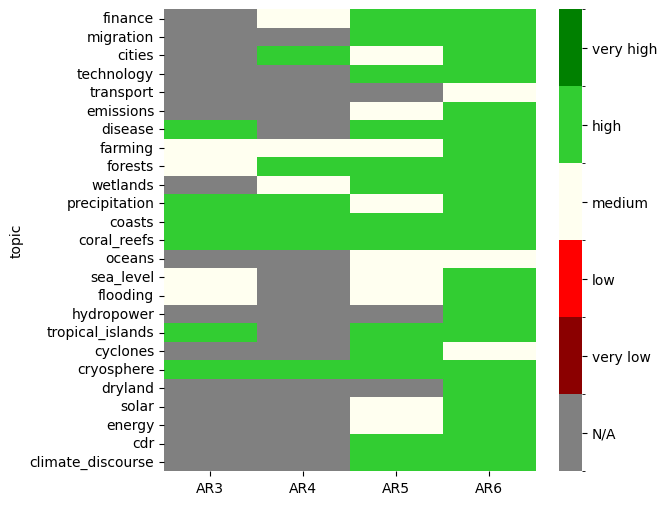

In [106]:
import seaborn as sns
from matplotlib.colors import ListedColormap, BoundaryNorm


clrs = ["grey", "darkred", "red", "ivory", "limegreen", "green"]
bounds = [-1, 0, 1, 2, 3, 4]
bounds = [-1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 4.5]
cmap = ListedColormap(clrs)
norm = BoundaryNorm(bounds, len(bounds))

fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(votes_df, ax=ax, cmap=cmap, norm=norm)

colorbar = ax.collections[0].colorbar
colorbar.set_ticks([-1, 0, 1, 2, 3, 4])
colorbar.set_ticklabels(["N/A", "very low", "low", "medium", "high", "very high"])

plt.show()

In [107]:
path = f"{gdrive_path}/climatex_full/topics"

scores, files = {}, os.listdir(path)
for file in files:
    report = file[:3]
    claims = pd.read_json(f"{path}/{file}", orient="records", lines=True)
    for topic in claims["topic"].unique():
        if topic == "other" or topic is None: continue
        if topic not in scores.keys(): 
            scores[topic] = {}
            for r in ["AR3", "AR4", "AR5", "AR6"]:
                scores[topic][r] = {tag: 0 for tag in ["very low", "low", "medium", "high", "very high"]}

        tags = claims.loc[claims["topic"] == topic, "tag"].tolist()
        for tag in ["very low", "low", "medium", "high", "very high"]:
            scores[topic][report][tag] += len([x for x in tags if x == tag])

for topic in scores.keys():
    for report in ["AR3", "AR4", "AR5", "AR6"]:
        totals = [scores[topic][report][tag] for tag in ["very low", "low", "medium", "high", "very high"]]
        if sum(totals) == 0: 
            del scores[topic][report]
        else:
            totals = [x / sum(totals) for x in totals]
            scores[topic][report] = totals

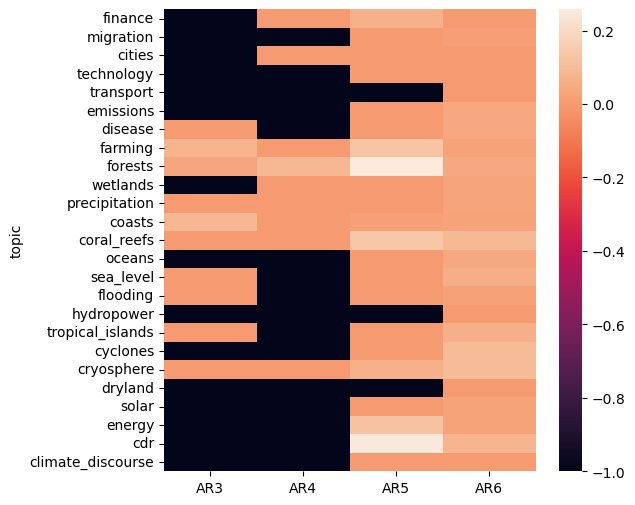

In [112]:
low_df = pd.DataFrame()
topics = list(scores.keys())
low_df["topic"] = topics
for report in ["AR3", "AR4", "AR5", "AR6"]:
    low = []
    for topic in topics:
        if report not in scores[topic].keys():
            low.append(-1)
        else:
            low.append(scores[topic][report][1])
    low_df[report] = low

low_df = low_df.set_index("topic").loc[topic_order]
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(low_df, ax=ax)
plt.show()

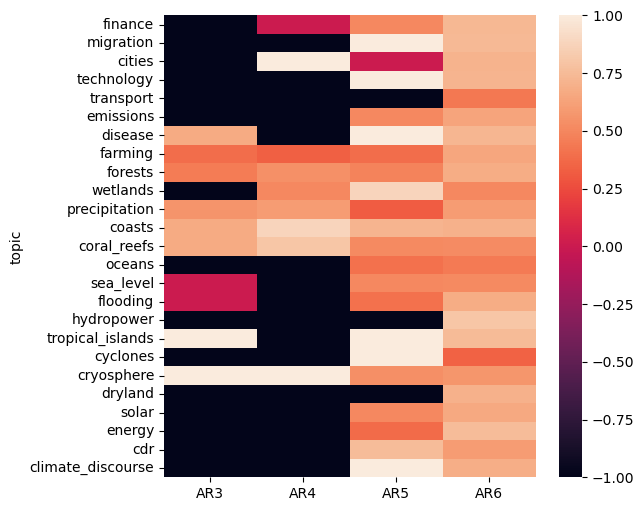

In [113]:
high_df = pd.DataFrame()
topics = list(scores.keys())
high_df["topic"] = topics
for report in ["AR3", "AR4", "AR5", "AR6"]:
    high = []
    for topic in topics:
        if report not in scores[topic].keys():
            high.append(-1)
        else:
            high.append(scores[topic][report][3])
    high_df[report] = high

high_df = high_df.set_index("topic").loc[topic_order]
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(high_df, ax=ax)
plt.show()